In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
r_soliton = 1.45#kpc
rho_soliton = 2.42e9#SM*kpc−3
rho_NFW = 0.037*rho_soliton
r_s = 0.39#kpc
m_axion = 2.44e-22#eV
G = 4.302e-6#kpc/SM(km/s)^2

In [5]:
def rho_reps(r,rho_sol,m_a):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    d = (1. + (r/rsol)**2.)**8.
    return 1/d

In [6]:
def rho_rmayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*(r_eps/r_s**3.)*(r_s + r_eps)**2.
    d = (r/r_s**3.)*(r_s + r)**2.
    return delta_NFW/d

In [7]:
r = np.linspace(0.,15.,100)

In [9]:
rsol_1 = ((0.037*rho_soliton/(2.42e9))*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_1 = rsol_1*np.sqrt(0.48**(-1./8.) - 1.)
r_1 = np.linspace(0.01,2,20)
r_2 = np.linspace(0.01,20.,90)
print r_eps_1,r_1

0.45246598658288756 [0.01       0.11473684 0.21947368 0.32421053 0.42894737 0.53368421
 0.63842105 0.74315789 0.84789474 0.95263158 1.05736842 1.16210526
 1.26684211 1.37157895 1.47631579 1.58105263 1.68578947 1.79052632
 1.89526316 2.        ]


Text(0.5,0,'r')

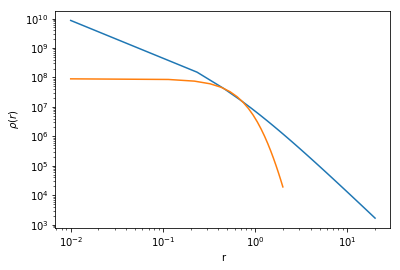

In [10]:
#plt.plot(r,rho_sol*0.037*rho_reps(r,rho_sol=0.037*rho_sol,m_a=m_axion))
#plt.plot(r,rho_sol*0.037*rho_rmayor(r,rho_sol=0.037*rho_sol,m_a=m_axion,eps=0.48,r_s=0.39))
plt.plot(r_2,rho_soliton*0.037*rho_rmayor(r_2,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39))
plt.plot(r_1,rho_soliton*0.037*rho_reps(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')
#plt.xlim(0,2.5)

In [11]:
rsol_2 = ((0.057*rho_soliton/(2.42e9))*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_2 = rsol_2*np.sqrt(0.464**(-1./8.) - 1.)
r_1_2 = np.linspace(0.,r_eps_2,10)
r_2_2 = np.linspace(r_eps_2,20.,90)

Text(0.5,0,'r')

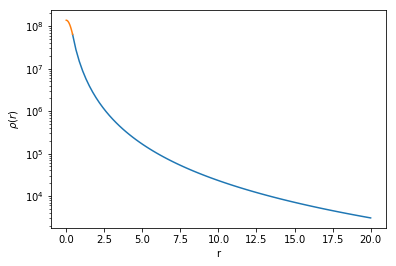

In [12]:
plt.plot(r_2_2,rho_soliton*0.057*rho_rmayor(r_2_2,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57))
plt.plot(r_1_2,rho_soliton*0.057*rho_reps(r_1_2,rho_sol=0.057*rho_soliton,m_a=m_axion))
plt.yscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')

In [20]:
def vc_rmayor(r,eps,r_s,m_a,rho_sol):
    rsol = ((rho_sol/(2.42e9))*(m_a/10.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*(r_eps/r_s**3.)*((r_s+r_eps))**2.
    t = np.log(r+r_s) - np.log(r_eps+r_s) + r_s/(r+r_s) - r_s/(r_eps+r_s)
    return 4.*np.pi*G*rho_sol*delta_NFW*r_s**3.*t/r

In [21]:
def vc_rminor(r,m_a,rho_sol,eps):
    rsol = ((rho_sol/(2.42e9))*(m_a/10.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    t = 3465.*rsol*r_eps**13. + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. - 3465.*r_eps*rsol**13. + 3465.*(r_eps**2. + rsol**2.)**7.*np.arctan(r_eps/rsol)
    d = 215040.*r*(r_eps**2. + rsol**2.)**7.
    return 4.*np.pi*G*rho_sol*rsol**3.*t/d

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


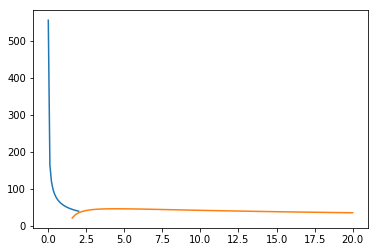

In [22]:
plt.plot(r_1,np.sqrt(vc_rminor(r_1,m_a=m_axion,rho_sol=0.037*rho_soliton,eps=0.48)))
plt.plot(r_2,np.sqrt(vc_rmayor(r_2,eps=0.48,r_s=0.39,m_a=m_axion,rho_sol=0.037*rho_soliton)))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


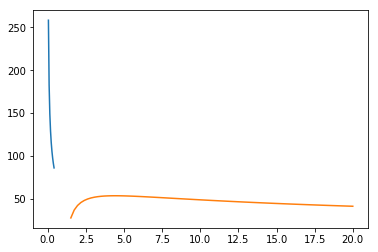

In [23]:
plt.plot(r_1_2,np.sqrt(vc_rminor(r_1_2,m_a=m_axion,rho_sol=0.037*rho_soliton,eps=0.48)))
plt.plot(r_2_2,np.sqrt(vc_rmayor(r_2_2,eps=0.464,r_s=0.57,m_a=m_axion,rho_sol=0.057*rho_soliton)))

In [26]:
1.0e-22==10.0**(-22)

True